## K-Nearest Neigbhoures KNN

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [35]:
df.shape

(3000, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [37]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


## EDA

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

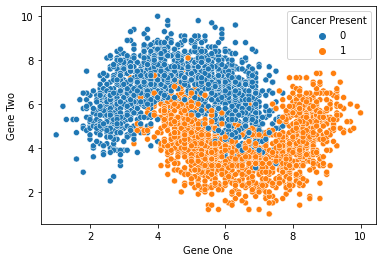

In [38]:
sns.scatterplot(x='Gene One',y='Gene Two',hue="Cancer Present",data=df)

## for cancer patient gene one values ranges from 4 to 10 and gene two value ranges from 1 to 6

TypeError: 'tuple' object is not callable

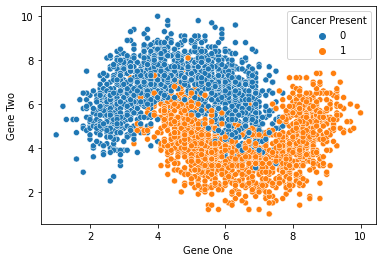

In [39]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

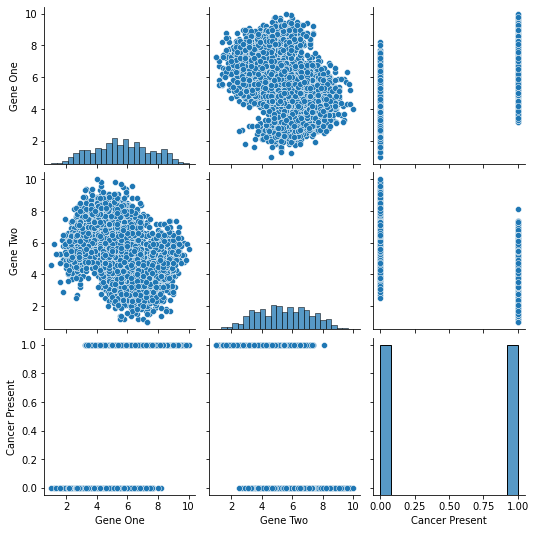

In [40]:
sns.pairplot(df)

In [44]:
x=df.corr()
x

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


<AxesSubplot:>

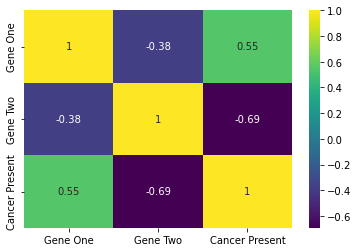

In [45]:
sns.heatmap(x,annot=True,cmap='viridis')

<AxesSubplot:xlabel='Gene One'>

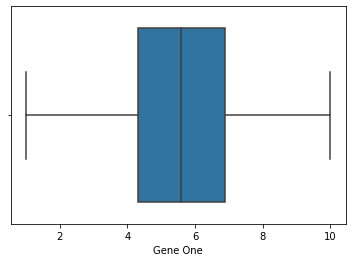

In [47]:
sns.boxplot(df['Gene One'],data=df)

<AxesSubplot:title={'center':'Cancer_Present'}, xlabel='Cancer Present', ylabel='Density'>

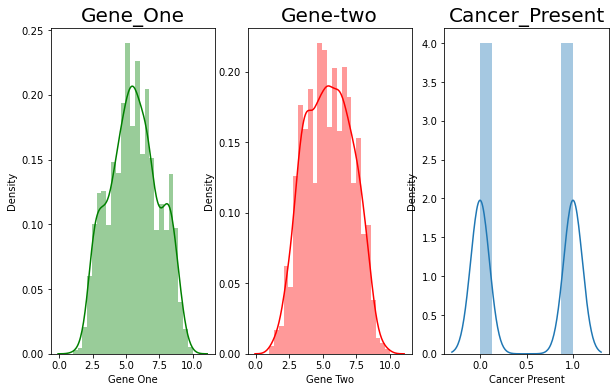

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('Gene_One',fontsize=20)
sns.distplot(df["Gene One"],color='green')

plt.subplot(1,3,2)
plt.title("Gene-two",fontsize=20)
sns.distplot(df['Gene Two'],color='red')

plt.subplot(1,3,3)
plt.title("Cancer_Present",fontsize=20)
sns.distplot(df['Cancer Present'])

## train test and split the data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
X=df.drop('Cancer Present',axis=1)

In [60]:
y=df['Cancer Present']

In [86]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [87]:
X_train.shape

(2100, 2)

In [88]:
y_test.shape

(900,)

In [89]:
scaler=StandardScaler()

In [90]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier(n_neighbors=1)

In [93]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
predictions=knn.predict(scaled_X_test)

In [95]:
predictions

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [96]:
data={"Actual":y_test,"predicted":predictions}
pd.DataFrame(data)

,Actual,predicted
1801,1,1
1190,1,1
1817,1,1
251,0,0
2505,0,0
...,...,...
2443,1,0
856,0,0
1983,1,1
166,0,1


In [97]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [98]:
accuracy_score(y_test,predictions)

0.8922222222222222

In [99]:
confusion_matrix(y_test,predictions)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



## Elbow method to choose K value

In [101]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i=knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
#error rate = avg error rate = avg where predictions were not equal to actual test values.
    

In [102]:
error_rate

[0.10777777777777778,
 0.1,
 0.07444444444444444,
 0.07666666666666666,
 0.07222222222222222,
 0.06444444444444444,
 0.06444444444444444,
 0.06222222222222222,
 0.06,
 0.06222222222222222,
 0.06222222222222222,
 0.06,
 0.06222222222222222,
 0.06222222222222222,
 0.06,
 0.056666666666666664,
 0.05555555555555555,
 0.05555555555555555,
 0.05333333333333334,
 0.05333333333333334,
 0.05444444444444444,
 0.051111111111111114,
 0.05444444444444444,
 0.05444444444444444,
 0.056666666666666664,
 0.056666666666666664,
 0.05555555555555555,
 0.057777777777777775,
 0.057777777777777775,
 0.052222222222222225,
 0.05555555555555555,
 0.05333333333333334,
 0.05555555555555555,
 0.05333333333333334,
 0.05444444444444444,
 0.05444444444444444,
 0.05555555555555555,
 0.05444444444444444,
 0.05444444444444444]

Text(0, 0.5, 'Error Rate')

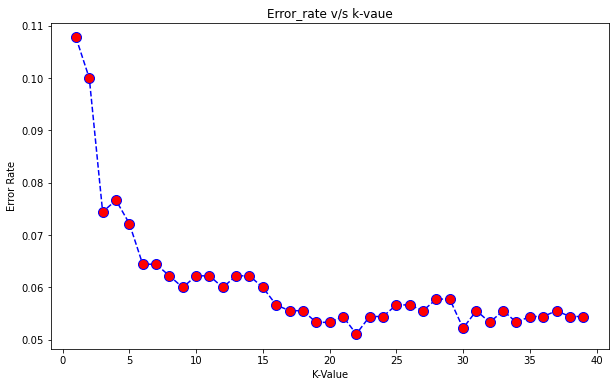

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markersize=10,markerfacecolor="red")
plt.title("Error_rate v/s k-vaue")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")

In [105]:
#from elbow method we got k=22 because it has lowest error rate
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(scaled_X_train,y_train)
pred_22=knn.predict(scaled_X_test)


In [106]:
accuracy_score(y_test,pred_22)

0.9488888888888889